In [29]:
from PIL import Image, ImageOps
import numpy as np
import os
root_dir = os.getcwd()

src = os.path.join(root_dir,'./YALE/centered/')
allFileNames = os.listdir(src)

# picsperclass = 11
picsperclass = 22
# load the image and convert into
# numpy array
numEigenfaces = 142 #previoulsy used 136
newsize = (106,128)
# newsize = (195,231) # previously used  (106, 128) #(195,231)
# newsize = (50,52) 
origdata = np.zeros((newsize[0]*newsize[1],165))
i = 0

#Original size is 320x243
for name in allFileNames:

    img = Image.open(src + name)
    img = img.convert("L")
    img = img.resize(newsize)
    img = ImageOps.equalize(img)
    if(i  == 1):
        img.show()
    # asarray() class is used to convert
    # PIL images into NumPy arrays
    numpydata = np.asarray(img)

    origdata[:,i] = numpydata.flatten()
    i+=1

origdata = origdata.T



In [30]:
print(origdata.shape)
classData = np.zeros((15,picsperclass,newsize[0]*newsize[1]))
for i in range(165):
    classData[i//11][i%11] = origdata[i]

(165, 13568)


In [31]:
# loading in fisherfaces
data = np.genfromtxt('EigenFaces.csv', delimiter=',')
projectmatrix = data[1:]
mean = data[0]
print(projectmatrix.shape)

(146, 13568)


In [32]:
# Clustering Test for Fisher


from sklearn.cluster import KMeans
import numpy as np



X =  origdata - mean.reshape(1,-1)

kmeans = KMeans(n_clusters=15, random_state=0)

projected = projectmatrix @ X.T

kmeans.fit(projected.T)

# Print the predicted class 
predicted_class = kmeans.predict(projected.T)
print(predicted_class)

c:\Users\chazp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chazp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[ 2 14 14  9 14 14  5 14 14 14 14  0  0  0  9  0  0  5  0  0  0  0 11 11
 11  9 11 11  5 11 11  6 11  6  6  6 12  6  6  5  6  6  6  6  7  7  7 12
  7  7  5  7  7  7  7  2  4  4  9  4  4  4  4  4  4  4  3  3  3  9  3  3
  5  3  3  3  3 10  0  6  9 10  0  0  6  6  6  6 13 13 13 12 13 13  5 13
 13 13 13 10 10 10  9 10 10 10 10 10  6 10  8  8  8  8  8  8  8  8  8  8
  8 10  1  1 12  1  1 10  1  1  1  1 11 11 11 11 11 11  5 11 11 11 11  6
  6  6 12  6  6  5  6  6  6  6  0  0  0  9  0  0  5  0  0  0  0]


In [33]:
# # Loading in Eigenfaces
# data = np.genfromtxt('EigenFaces.csv', delimiter=',')
# projectmatrix = data[1:]
# print(projectmatrix.shape)

In [34]:

transformmat = projectmatrix
print(np.linalg.norm(projectmatrix[5]))
print(transformmat.shape)
#2nd from last, 4th from last, 3rd from first, 4th from first, 5th from first 
temp = transformmat  @ X.T
print(temp.shape)
temp = temp - temp[:,16].reshape(-1,1)


0.9999999999999994
(146, 13568)
(146, 165)


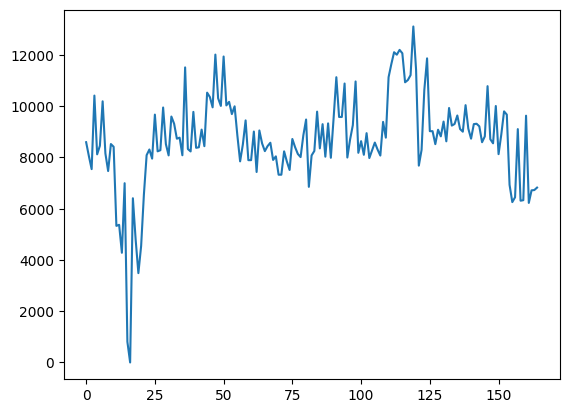

In [35]:
import matplotlib.pyplot as plt
toPlot = np.linalg.norm(temp,axis = 0)
# toPlot = np.sum(temp,axis = 0)

plt.plot(np.arange(165),toPlot)

In [36]:
# data = np.genfromtxt('MeanAndFaces.csv', delimiter=',')
# eigenMat = data[1:]
# mean = data[0]
numpics = 3
numProjects = transformmat.shape[0]
new_size = newsize
print(mean.shape)
print(transformmat.shape)

aahanfolder = 'newImages/aahancloser/'
rudyfolder = 'newImages/rudycloser/'
chazfolder = 'newImages/chazcloser/'



(13568,)
(146, 13568)


In [37]:
root_dir = os.getcwd()
src = os.path.join(root_dir,aahanfolder)

allFileNames = os.listdir(src)
 


aahanData = np.zeros((numpics,numProjects))

i = 0
for name in allFileNames:

    img = Image.open(src + name)
    img = img.convert("L")
    img = img.resize(new_size, resample=Image.LANCZOS)
    # img.show()
    img = np.array(img)
    img = np.ndarray.flatten(img) - mean
    aahanData[i,:] = transformmat @ img
    i+=1

In [38]:
#getting chaz data

root_dir = os.getcwd()
src = os.path.join(root_dir,chazfolder)

allFileNames = os.listdir(src)
 


chazData = np.zeros((numpics,numProjects))

i = 0
for name in allFileNames:

    img = Image.open(src + name)
    img = img.convert("L")
    if(i==1):
        img.show()
    img = img.resize(new_size, resample=Image.LANCZOS)
    img = np.array(img)
    img = np.ndarray.flatten(img) - mean
    print(transformmat.shape)

    chazData[i,:] = transformmat @ img
    i+=1

(146, 13568)
(146, 13568)
(146, 13568)


In [39]:
#getting rudy data

root_dir = os.getcwd()
src = os.path.join(root_dir,rudyfolder)

allFileNames = os.listdir(src)
 
rudyData = np.zeros((numpics,numProjects))

i = 0
for name in allFileNames:

    img = Image.open(src + name)
    img = img.convert("L")
    img = img.resize(new_size, resample=Image.LANCZOS)
    img = np.array(img)
    img = np.ndarray.flatten(img) - mean
    rudyData[i,:] = transformmat @ img
    i+=1

In [40]:
print(aahanData @ chazData.T)

[[36082389.90335101 40745133.07239244 43619488.96224351]
 [31522135.59548233 37044277.31287312 41258008.20024045]
 [35739403.37152222 40833472.11544667 43973938.36523475]]


In [41]:
print((rudyData @ rudyData.T)/(rudyData @ aahanData.T))

[[0.94449957 0.92102783 1.22709588]
 [0.93298735 0.93419083 1.21204054]
 [0.88237468 0.82961662 1.26859571]]


In [42]:
temp = chazData.T @ chazData
print(np.diagonal(temp))

[2.98059852e+05 3.02543368e+05 1.86103306e+05 7.52897757e+06
 3.53725353e+07 4.49329475e+05 7.82007884e+05 5.68518347e+06
 1.25094289e+06 1.61064706e+06 6.27658366e+06 4.30954535e+06
 3.53416185e+06 3.09706842e+06 5.36458600e+06 2.89567433e+06
 4.89949014e+05 1.41662251e+05 1.82490423e+05 4.61082313e+04
 6.63035448e+06 5.57820860e+05 8.44020041e+04 4.81431467e+05
 4.30868037e+06 1.15031128e+07 9.42351723e+03 9.67381344e+04
 4.35297240e+04 2.03516160e+06 5.13525556e+04 5.52633450e+05
 2.19710878e+05 8.10083351e+04 1.89009288e+05 7.95656255e+05
 4.26033140e+05 3.00493008e+05 4.33836966e+04 2.13491569e+06
 4.40644522e+04 9.72057390e+03 7.55684230e+04 2.60460708e+05
 2.19928832e+05 4.53411445e+05 6.28186738e+05 1.00264719e+05
 2.43656354e+05 9.66667589e+04 3.39264047e+05 8.67786277e+02
 1.95268983e+05 7.99260444e+05 3.33771966e+03 1.09575798e+06
 3.16002985e+05 4.71201450e+04 5.43552284e+05 3.69929505e+05
 1.46054227e+05 1.65109191e+05 2.17902788e+05 1.54333977e+06
 1.09231887e+03 1.405390

In [43]:
temp = rudyData.T @ aahanData
print(np.diagonal(temp)) #2nd from last 4th from last, 3rd from first, 4th from first, 5th from first 

[ 4.11870439e+04  1.68820703e+07  9.32238234e+06  4.03023665e+07
  4.19607811e+07  2.36893374e+07  1.41450889e+05  5.93123191e+06
  2.81679216e+07  2.85949194e+06  1.09734293e+07  5.42983153e+06
  6.82763573e+06  1.75375401e+06  1.76177789e+05  3.30319776e+06
  4.34969814e+04  5.72191449e+05  1.09297718e+06  5.95108172e+06
  9.08772315e+06  2.68341357e+05  1.75997186e+06  3.49423125e+05
  4.03166773e+06  9.99235894e+06  3.11683553e+05  2.82952303e+05
  8.76598176e+03  1.74502389e+06  4.54281656e+05  9.05426654e+05
 -5.43037892e+03  3.83274213e+05  3.01898736e+04 -7.56325376e+02
  3.34244746e+05  1.16296741e+06  1.20986596e+05  1.96225807e+06
  6.30955648e+05  3.49890783e+05  3.35140174e+05  1.74114253e+06
  4.31505964e+03  3.08623938e+05  2.61539557e+05  1.52866023e+04
  2.62880856e+04 -2.61692932e+04  6.23929379e+05  6.85597987e+05
  3.94863280e+04  8.33650454e+05  9.30590543e+04  3.44512862e+05
  8.23070389e+05 -2.89849998e+04  3.62324740e+05  9.12281653e+04
  5.68366225e+05  3.39441

In [44]:
temp = chazData.T @ rudyData
print(np.diagonal(temp))

[ 2.29661321e+05  2.10858796e+06  1.63776598e+06  1.72732030e+07
  4.08915812e+07 -2.04766268e+06  2.31985809e+05  6.93439767e+06
  5.81178837e+06  1.66811027e+06 -6.02202467e+06  4.62020384e+06
  4.61881075e+06  2.96591057e+06  1.13519340e+06  2.59695258e+06
  3.24207281e+05  2.01811393e+05 -3.14859155e+05 -2.81984597e+05
  6.60785230e+06  3.09920201e+05  3.77256905e+05 -3.69860053e+05
  4.41200725e+06  1.05968093e+07 -1.78519629e+04 -6.74146315e+03
  4.40179355e+03  1.78678462e+06 -3.07820067e+04  6.34028094e+05
 -6.26182131e+04 -1.66008171e+05 -4.57930616e+04 -6.73928545e+04
  3.71804813e+05 -4.82301595e+05  5.34825759e+04  1.68796846e+06
  1.27714359e+05  4.19093250e+04 -1.72333296e+05  6.06513079e+05
  1.03641693e+04 -3.10697400e+05 -2.55977581e+05 -3.73374194e+04
  5.94181446e+04  3.47177348e+04  5.25639335e+05  2.20416924e+04
  1.38195997e+05  7.54649432e+05  5.35191718e+03  6.36096175e+05
  5.08028839e+05  8.01573732e+04  3.32761941e+05  7.82053050e+04
  3.14718349e+05  2.42376

In [51]:
print(transformmat[5].dot(transformmat[3]))

toshow = transformmat[120] + mean
# print(np.amin(toshow))
toshow = toshow.reshape((new_size[1],newsize[0])) 
toshow= Image.fromarray(toshow.astype(np.uint8), mode='L')
toshow.show()


-2.7755575615628914e-17
